Chapter 4 Lotka-Volterra Competition
-Algorithm to calculate 2 seperate species to visualize interspecific 


M population reaches zero at year: 24


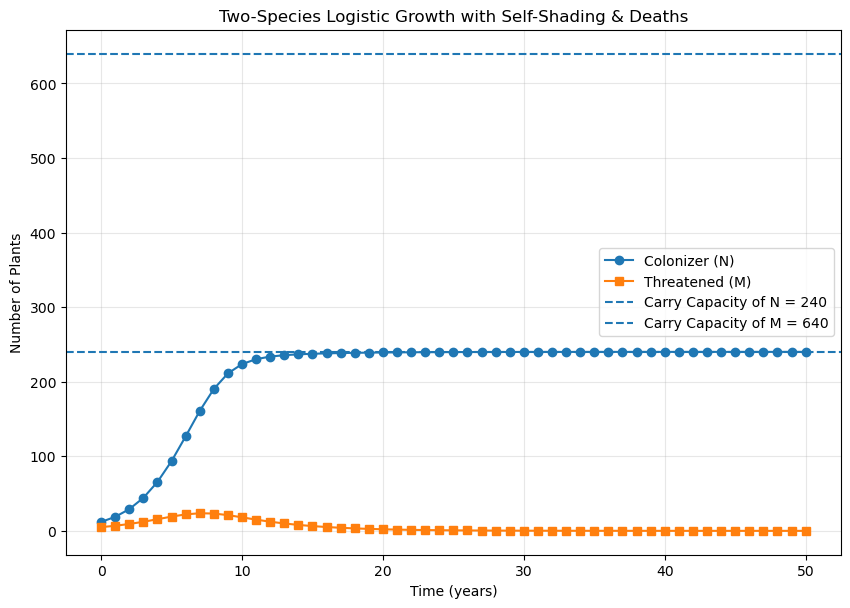

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

S = 1 

def NandM(N_0, M_0, time, K_N, K_M, S, D_N, D_M):
    """
    #N_0 = initial duckweed patch size in m^2 of the original. It has an initial population of 12.
    #M_0 = initial population of the new plant species (1/4 the size). It has an initial population of 5
    #S = number of seeds produced per year by an adult plant (same value for both)
    #K_N = maximum number of adult plants of the original size that can fit in the plot (carrying capacity of 400)
    #K_M = maximum number of adult plants of the new species (1/4 the size) that can fit in the plot (carrying capacity of 1600)
    #D_N = death rate for adult plants of the original species
    #D_M = death rate for adult plants of the new species (1/4 the size)
    #time = number of years to simulate
    """

    N_values = [N_0] # Lists to store population of N over time 
    M_values = [M_0] # Lists to store population of M over time 


    current_N = N_0 # Current population for N
    current_M = M_0 #Current population for M

    # I am going to iterate the difference equations 
    for _ in range(time):
        # Colonizer (N) 
        # Nt+1 = Nt + S*Nt*(1 - Nt/K_N - Mt/K_M) - D_N*Nt
        births_N = S * current_N * (1 - current_N / K_N - current_M / K_M)
        deaths_N = D_N * current_N
        next_N = current_N + births_N - deaths_N

        # Threatened (M)
        # Mt+1 = Mt + S*Mt*(1 - Mt/K_M - Nt/K_N) - D_M*Mt
        births_M = S * current_M * (1 - current_M / K_M - current_N / K_N)
        deaths_M = D_M * current_M
        next_M = current_M + births_M - deaths_M

        # Prevent negative populations. I rounded to 3 decimals 
        current_N = max(0.0, round(next_N, 3))
        current_M = max(0.0, round(next_M, 3))

        # Record values for this time 
        N_values.append(current_N)
        M_values.append(current_M)

    # Return the full lists 
    return N_values, M_values


# Parameters for the equations
N_0 = 12      # colonizer (original) start
M_0 = 5       # threatened (1/4 size) start
K_N = 400     # max original plants
K_M = 1600    # max small plants (4x)
D_N = 0.4     # death rate original
D_M = 0.6     # death rate threatened
years = 50    # simulate time

# This is to run simulation
N_values, M_values = NandM(N_0, M_0, years, K_N, K_M, S, D_N, D_M)
t = np.arange(0, years + 1)

# Fraction of plot covered at each time 
covered_frac = np.array(N_values) / K_N + np.array(M_values) / K_M
open_frac = 1 - covered_frac
open_frac = np.clip(open_frac, 0, 1)
covered_frac = np.clip(covered_frac, 0, 1)

# Ploting the graph
plt.figure(figsize=(10, 15))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(t, N_values, marker="o", label="Colonizer (N)") 
ax1.plot(t, M_values, marker="s", label="Threatened (M)")
ax1.axhline(y=(S - D_N) * K_N / S, linestyle="--", label=f"Carry Capacity of N = {(S - D_N) * K_N / S:.0f}")
ax1.axhline(y=(S - D_M) * K_M / S, linestyle="--", label=f"Carry Capacity of M = {(S - D_M) * K_M / S:.0f}")
ax1.set_title("Two-Species Logistic Growth with Self-Shading & Deaths")
ax1.set_xlabel("Time (years)")
ax1.set_ylabel("Number of Plants")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Loop to determine when M reaches 0
#
M_array = np.array(M_values)
below_one_years = np.where(M_array < 1)[0]

if below_one_years.size > 0:
    print("M population reaches zero at year:", below_one_years[0])
else:
    print("M population never reaches zero within the time.")






Q1: Describe figure:

The colonizer species (N) begins with 12 individuals and increases over time. 
Its growth follows the S-shaped logistic curve and eventually levels off at about 240 individuals,
which is its carrying capacity. The threatened species (M) starts with 5 individuals and initially 
increases in number during the first several years. Around year 7, its population reaches a peak, but then it begins to 
decline. By year 24, the threatened population reaches zero (below 1) and remains extinct for the rest of the simulation. 
I also added dashed lines, which are the carrying capacities of both species, 240 for N and 640 for M

Q2: What year does M population reaches zero (below 1)?

It reaches zero (below 1) at year 24

Competitive Exlusion

Alpha M*N = KM / KN = 4 

Alpha  = KN / KM = .25

RN= SN - DN

RM = SM - DM

RM and RN are the net growth rates that show how fast each species can grow when its population is small and competition is minimal. RN for colonizer and RM for Threatened

Q3: At what point does alpha need to be for both for both to coexist?

The rule states that two species can coexist only when both of the alpha variables are less than 1. 